<a href="https://colab.research.google.com/github/SunitaParajuli/Improved-CNN-using-Data-Augmentation-and-Normalization/blob/main/Improved_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten() ##
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
K = len(set(y_train))
print("No. of classes "+str(K))

No. of classes 10


In [5]:
i = Input(shape = x_train[0].shape)

x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 24s 7ms/step - loss: 1.2806 - accuracy: 0.5604 - val_loss: 0.9731 - val_accuracy: 0.6567
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8343 - accuracy: 0.7110 - val_loss: 0.7687 - val_accuracy: 0.7402
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6907 - accuracy: 0.7612 - val_loss: 0.7485 - val_accuracy: 0.7487
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5863 - accuracy: 0.7974 - val_loss: 0.6623 - val_accuracy: 0.7758
Epoch 5/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4965 - accuracy: 0.8297 - val_loss: 0.6571 - val_accuracy: 0.7825
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4180 - accuracy: 0.8546 - val_loss: 0.6737 - val_accuracy: 0.7917
Epoch 7/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3568 - accuracy: 0.8756 - val_loss: 0.7021 - val_ac

In [7]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


1562/1562 [==============================] - 34s 21ms/step - loss: 0.6053 - accuracy: 0.8033 - val_loss: 0.6421 - val_accuracy: 0.7943
Epoch 2/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.5025 - accuracy: 0.8311 - val_loss: 0.5133 - val_accuracy: 0.8307
Epoch 3/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4687 - accuracy: 0.8433 - val_loss: 0.5173 - val_accuracy: 0.8236
Epoch 4/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.4375 - accuracy: 0.8522 - val_loss: 0.4676 - val_accuracy: 0.8440
Epoch 5/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4163 - accuracy: 0.8598 - val_loss: 0.4605 - val_accuracy: 0.8464
Epoch 6/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.3972 - accuracy: 0.8642 - val_loss: 0.4653 - val_accuracy: 0.8512
Epoch 7/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.3870 - accuracy: 0.8676 - val_loss: 0.4519 - val_accura

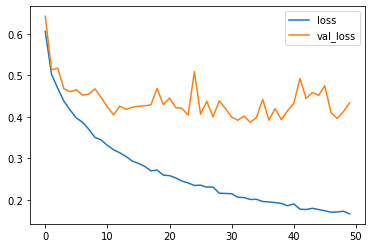

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

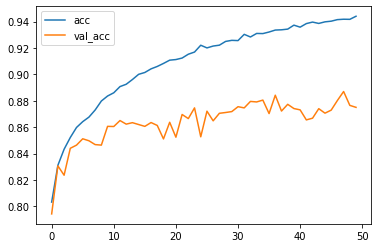

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[879  13  42   8   8   4   8  12  19   7]
 [  3 962   4   2   0   0   6   1   3  19]
 [ 10   0 881  22  21  20  33  11   2   0]
 [ 13   3  53 696  34 104  72  20   1   4]
 [  4   0  42  13 869  13  38  20   1   0]
 [  6   1  38  64  25 815  25  22   1   3]
 [  3   1  24   8   6   5 947   2   0   4]
 [  4   1  14  10  24  37   6 902   1   1]
 [ 38  17  11   6   2   0  11   4 888  23]
 [  7  52   6   6   1   1   8   4   4 911]]


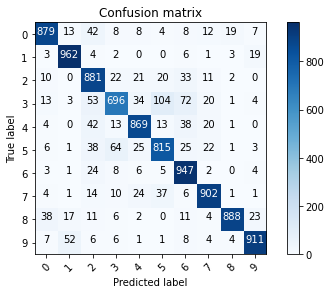

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

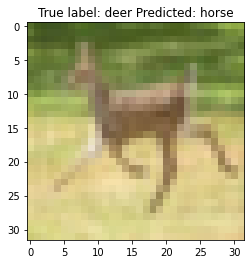

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     